# Sesión 3: Preprocesamiento de Datos
## De EDA a Modelo: Preparando los Datos para Machine Learning

### 🎯 Objetivos de la Sesión
1. **Comprender la importancia** del preprocesamiento en ML
2. **Dominar técnicas de normalización** y estandarización
3. **Implementar división correcta** de datos (train/validation/test)
4. **Aplicar feature engineering** básico
5. **Crear pipelines robustos** para evitar data leakage

---

## 📚 Parte 1: Fundamentos Teóricos del Preprocesamiento

### 🔧 ¿Qué es el Preprocesamiento de Datos?

**Definición**: El preprocesamiento es el conjunto de técnicas aplicadas para **transformar datos en bruto en un formato adecuado para algoritmos de Machine Learning**.

> *"Los datos reales son como ingredientes sin procesar. El preprocesamiento es como cocinarlos para que sean digeribles por los algoritmos"*

### 🎯 ¿Por qué es Crucial el Preprocesamiento?
#### **1. Los Algoritmos son Sensibles a la Escala** 📏


**Algoritmos más afectados por escala:**
- **K-Nearest Neighbors (KNN)**: Usa distancias directamente
- **Support Vector Machine (SVM)**: Sensible a rangos de features
- **Redes Neuronales**: Requieren entrada normalizada
- **Gradient Descent**: Converge más rápido con datos normalizados

**Algoritmos menos afectados:**
- **Árboles de Decisión**: Usan splits, no distancias
- **Random Forest**: Hereda robustez de árboles
- **Naive Bayes**: Trabaja con probabilidades

#### **2. Mejora del Rendimiento Computacional** ⚡
- **Convergencia más rápida**: Algoritmos iterativos convergen en menos epochs
- **Estabilidad numérica**: Evita overflow/underflow en cálculos
- **Gradientes balanceados**: En redes neuronales, evita gradientes que explotan o desaparecen

#### **3. Interpretabilidad y Fairness** ⚖️
- **Coeficientes comparables**: En regresión lineal, coeficientes pueden compararse
- **Importancia equilibrada**: Features no dominan por escala
- **Eliminación de sesgos**: Evita que variables con mayor rango artificial dominen

### 📊 Técnicas de Escalado y Normalización

#### **1. Normalización (Min-Max Scaling)** 📐

**Fórmula**: `X_norm = (X - X_min) / (X_max - X_min)`

**Características**:
- **Rango resultante**: [0, 1]
- **Preserva relaciones**: Mantiene distribución original
- **Sensible a outliers**: Valores extremos afectan el rango

**Cuándo usar Min-Max:**
- ✅ Cuando conocemos los límites naturales de las variables
- ✅ Para algoritmos que requieren entrada en [0,1] (redes neuronales con sigmoid)
- ✅ Cuando la distribución es aproximadamente uniforme
- ❌ Evitar con muchos outliers

#### **2. Estandarización (Z-Score Normalization)** 📊

**Fórmula**: `X_std = (X - μ) / σ`

**Características**:
- **Distribución resultante**: Media = 0, Desviación estándar = 1
- **Robusta a outliers**: Menos afectada por valores extremos
- **Preserva forma**: Mantiene la forma de la distribución

**Cuándo usar Estandarización:**
- ✅ **Distribuciones normales** o aproximadamente normales
- ✅ **Presencia de outliers** (más robusta que Min-Max)
- ✅ **Algoritmos basados en distancia** (KNN, SVM, PCA)
- ✅ **Por defecto** en la mayoría de casos

#### **3. Normalización Robusta** 🛡️

**Fórmula**: `X_robust = (X - Q2) / (Q3 - Q1)`

**Características**:
- **Usa mediana y rango intercuartílico**
- **Muy robusta a outliers**
- **Rango resultante**: Variable, centrado en 0

### 🔄 División de Datos: Train/Validation/Test

#### **1. ¿Por qué Dividir los Datos?** 🤔

**Principio fundamental**: Necesitamos evaluar qué tan bien nuestro modelo funciona con **datos completamente nuevos** que nunca ha visto.

**Analogía**: 
- **Training**: Como estudiar para un examen
- **Validation**: Como hacer exámenes de práctica
- **Test**: Como el examen final real

#### **2. División Estándar** 📊

```
Total Dataset (100%)
├── Training Set (70%)    # Para entrenar el modelo
├── Validation Set (15%)  # Para optimizar hiperparámetros
└── Test Set (15%)        # Para evaluación final
```

**Funciones de cada conjunto**:

**Training Set** 🏋️:
- **Propósito**: Entrenar el modelo (ajustar parámetros internos)
- **Uso**: `model.fit(X_train, y_train)`
- **Tamaño**: 60-80% de los datos

**Validation Set** ⚖️:
- **Propósito**: Optimizar hiperparámetros y seleccionar modelo
- **Uso**: `model.score(X_val, y_val)` durante tuning
- **Tamaño**: 10-20% de los datos

**Test Set** 🎯:
- **Propósito**: Evaluación final y estimación de rendimiento real
- **Uso**: Solo al final, una vez definido el modelo
- **Tamaño**: 10-20% de los datos

#### **3. División Estratificada** 🎯

**Problema**: División aleatoria puede crear conjuntos desbalanceados

+ Problema potencial:
+ Dataset original: 60% Benign, 40% Malignant
+ Training set aleatorio: 70% Benign, 30% Malignant  ❌


**Solución**: División estratificada mantiene proporciones

#### **4. Validación Cruzada (Cross-Validation)** 🔄

**Concepto**: En lugar de una división fija, usa múltiples divisiones para evaluación más robusta.

**K-Fold Cross Validation**:
```
Fold 1: Train[2,3,4,5] Test[1]
Fold 2: Train[1,3,4,5] Test[2]
Fold 3: Train[1,2,4,5] Test[3]
Fold 4: Train[1,2,3,5] Test[4]
Fold 5: Train[1,2,3,4] Test[5]

Score final = Promedio de los 5 scores
```

**Ventajas**:
- ✅ **Uso eficiente de datos**: Todos los datos se usan para entrenamiento y test
- ✅ **Evaluación más robusta**: Menos dependiente de división específica
- ✅ **Detección de variabilidad**: Muestra rango de rendimiento

**Desventajas**:
- ❌ **Costo computacional**: 5x más tiempo de entrenamiento
- ❌ **No devuelve modelo**: Solo evaluación, no un modelo deployable

### 🔧 Feature Engineering Básico

#### **1. ¿Qué es Feature Engineering?** 🛠️

**Definición**: Proceso de crear nuevas características (features) o transformar las existentes para mejorar el rendimiento del modelo.

**Principio**: "*Los datos dicen mucho, pero las características bien diseñadas lo dicen todo*"

#### **2. Técnicas Básicas de Feature Engineering** 

**A. Combinación de Features** ➕
**B. Transformaciones Matemáticas** 📐
**C. Binning/Discretización** 📊
**D. Feature Selection** 🎯

#### **3. Feature Engineering para Breast Cancer** 🏥

### 🚰 Pipelines y Prevención de Data Leakage

#### **1. ¿Qué es Data Leakage?** 💧

**Definición**: Cuando información del conjunto de test "se filtra" durante el entrenamiento, causando métricas infladas artificialmente.

**Ejemplo de Data Leakage**:

# ❌ INCORRECTO: Normalizar antes de dividir
+ scaler = StandardScaler()
+ X_scaled = scaler.fit_transform(X)  # Usa estadísticas de TODO el dataset
+ X_train, X_test = train_test_split(X_scaled, y)

# Problema: Las estadísticas del test set influyeron en el scaling del training set

**Enfoque Correcto**:

# ✅ CORRECTO: Dividir primero, luego normalizar
+ X_train, X_test = train_test_split(X, y)
+ scaler = StandardScaler()
+ X_train_scaled = scaler.fit_transform(X_train)  # Solo estadísticas del training
+ X_test_scaled = scaler.transform(X_test)        # Aplicar scaling del training


#### **2. Pipelines de Scikit-Learn** 🔧

**Ventaja**: Automatiza el orden correcto de operaciones y previene data leakage.

El pipeline automáticamente:

+ 1. Hace fit_transform(scaler) solo en training data
+ 2. Hace transform(scaler) en validation/test data
+ 3. Entrena el clasificador con datos normalizados

#### **3. Pipelines con Validación Cruzada** 🔄

En cada fold:

+ 1. Pipeline toma 4/5 de X_train para entrenar
+ 2. Normaliza solo esos datos
+ 3. Entrena el modelo
+ 4. Normaliza el 1/5 restante usando estadísticas del entrenamiento
+ 5. Evalúa en ese 1/5

#### **4. Pipeline Completo para Breast Cancer** 🏥

# Uso del pipeline
pipe = create_breast_cancer_pipeline()
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

### ⚠️ Errores Comunes en Preprocesamiento

#### **1. Normalizar Antes de Dividir** ❌

# ❌ Error común
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test = train_test_split(X_scaled, y)


#### **2. No Aplicar las Mismas Transformaciones** ❌

# ❌ Error común
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)  # Diferentes estadísticas!


#### **3. Usar Test Set para Feature Selection** ❌

# ❌ Error común
correlation_with_target = df.corr()['target'].abs()
best_features = correlation_with_target.nlargest(10).index  # Usa todo el dataset!
X_train, X_test = train_test_split(df[best_features], y)


#### **4. No Manejar Datos Categóricos Correctamente** ❌

# ❌ Error común con variables categóricas
# Aplicar escalado a variables categóricas codificadas
# OneHotEncoder después del scaling


### 📋 Checklist de Preprocesamiento

#### **✅ Antes de Dividir los Datos**
- [ ] Análisis exploratorio completo (EDA)
- [ ] Identificación de tipos de variables
- [ ] Detección de valores faltantes y outliers
- [ ] Feature engineering inicial (si aplica)

#### **✅ División de Datos**
- [ ] División estratificada si es clasificación
- [ ] Proporciones apropiadas (70/15/15 o 80/20)
- [ ] Semilla fija para reproducibilidad
- [ ] Verificación de distribuciones en cada conjunto

#### **✅ Preprocesamiento por Conjunto**
- [ ] Transformaciones fit solo en training set
- [ ] Aplicar transformaciones a validation/test sets
- [ ] Documentar parámetros de transformación
- [ ] Verificar rangos y distribuciones post-transformación

#### **✅ Validación**
- [ ] No hay data leakage
- [ ] Pipeline funciona end-to-end
- [ ] Transformaciones son reversibles (si necesario)
- [ ] Métricas de calidad post-preprocesamiento

## 💻 Parte 2: Implementación Práctica - Breast Cancer Dataset
### 🔧 Configuración del Entorno

In [2]:
# Importar librerías esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configuración para reproducibilidad
np.random.seed(42)

print("✅ Librerías importadas correctamente")
print("🔧 Configuración establecida")

✅ Librerías importadas correctamente
🔧 Configuración establecida


### 📊 Carga y Revisión de Datos

In [3]:
# Cargar dataset Breast Cancer Wisconsin
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("📊 RESUMEN DEL DATASET")
print("=" * 40)
print(f"📏 Dimensiones: {df.shape}")
print(f"🎯 Clases: {df['diagnosis'].value_counts().to_dict()}")
print(f"📋 Features disponibles: {len(cancer.feature_names)}")

# Separar features y target
X = df.drop(['target', 'diagnosis'], axis=1)
y = df['target']

print(f"\n✅ Datos preparados:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Distribución: {np.bincount(y)} [malignant, benign]")

📊 RESUMEN DEL DATASET
📏 Dimensiones: (569, 32)
🎯 Clases: {'benign': 357, 'malignant': 212}
📋 Features disponibles: 30

✅ Datos preparados:
   Features (X): (569, 30)
   Target (y): (569,)
   Distribución: [212 357] [malignant, benign]


### 🛠️ Feature Engineering Médico Específico

In [4]:
def create_medical_features(df_features):
    """
    Crea features específicas para diagnóstico de cáncer
    basadas en conocimiento médico y hallazgos del EDA
    """
    df_eng = df_features.copy()
    
    print("🔬 CREANDO FEATURES MÉDICAS ESPECÍFICAS")
    print("=" * 50)
    
    # 1. Ratios geométricos (forma del tumor)
    print("1️⃣ Ratios geométricos:")
    df_eng['area_to_perimeter_ratio'] = df_eng['mean area'] / df_eng['mean perimeter']
    df_eng['area_to_radius_squared'] = df_eng['mean area'] / (df_eng['mean radius'] ** 2)
    print("   ✓ area_to_perimeter_ratio (compacidad)")
    print("   ✓ area_to_radius_squared (regularidad circular)")
    
    # 2. Índices de irregularidad
    print("\n2️⃣ Índices de irregularidad:")
    df_eng['texture_roughness'] = df_eng['mean texture'] * df_eng['mean fractal dimension']
    df_eng['shape_complexity'] = df_eng['mean concavity'] * df_eng['mean concave points']
    print("   ✓ texture_roughness (rugosidad superficial)")
    print("   ✓ shape_complexity (complejidad de forma)")
    
    # 3. Índice de malignidad compuesto
    print("\n3️⃣ Índice de malignidad compuesto:")
    df_eng['malignancy_index'] = (
        df_eng['mean radius'] * df_eng['mean compactness'] * df_eng['mean concavity']
    ) / (df_eng['mean smoothness'] + 0.001)  # +0.001 para evitar división por cero
    print("   ✓ malignancy_index (índice compuesto de malignidad)")
    
    # 4. Variabilidad (worst - mean) - indica heterogeneidad del tumor
    print("\n4️⃣ Métricas de variabilidad:")
    variability_features = ['radius', 'texture', 'perimeter', 'area']
    for feature in variability_features:
        if f'worst {feature}' in df_eng.columns and f'mean {feature}' in df_eng.columns:
            df_eng[f'{feature}_variability'] = (
                df_eng[f'worst {feature}'] - df_eng[f'mean {feature}']
            )
            print(f"   ✓ {feature}_variability")
    
    # 5. Ratio de error estándar (indica precisión de medición)
    print("\n5️⃣ Ratios de precisión:")
    error_features = [f for f in df_eng.columns if 'error' in f][:3]  # Primeros 3
    for error_feat in error_features:
        base_name = error_feat.replace(' error', '')
        if f'mean {base_name}' in df_eng.columns:
            df_eng[f'{base_name}_precision_ratio'] = (
                df_eng[f'mean {base_name}'] / (df_eng[error_feat] + 0.001)
            )
            print(f"   ✓ {base_name}_precision_ratio")
    
    new_features = [col for col in df_eng.columns if col not in df_features.columns]
    print(f"\n✅ {len(new_features)} nuevas características creadas")
    print(f"📊 Dataset expandido: {df_features.shape} → {df_eng.shape}")
    
    return df_eng, new_features

# Aplicar feature engineering
X_engineered, new_features = create_medical_features(X)

# Mostrar correlación de nuevas features con target
print("\n🔍 CORRELACIÓN DE NUEVAS FEATURES CON TARGET:")
correlations = pd.DataFrame({
    'feature': new_features,
    'correlation': [abs(X_engineered[feat].corr(y)) for feat in new_features]
}).sort_values('correlation', ascending=False)

for _, row in correlations.head(5).iterrows():
    print(f"   {row['feature']}: {row['correlation']:.3f}")

🔬 CREANDO FEATURES MÉDICAS ESPECÍFICAS
1️⃣ Ratios geométricos:
   ✓ area_to_perimeter_ratio (compacidad)
   ✓ area_to_radius_squared (regularidad circular)

2️⃣ Índices de irregularidad:
   ✓ texture_roughness (rugosidad superficial)
   ✓ shape_complexity (complejidad de forma)

3️⃣ Índice de malignidad compuesto:
   ✓ malignancy_index (índice compuesto de malignidad)

4️⃣ Métricas de variabilidad:
   ✓ radius_variability
   ✓ texture_variability
   ✓ perimeter_variability
   ✓ area_variability

5️⃣ Ratios de precisión:
   ✓ radius_precision_ratio
   ✓ texture_precision_ratio
   ✓ perimeter_precision_ratio

✅ 12 nuevas características creadas
📊 Dataset expandido: (569, 30) → (569, 42)

🔍 CORRELACIÓN DE NUEVAS FEATURES CON TARGET:
   area_to_perimeter_ratio: 0.716
   radius_variability: 0.711
   perimeter_variability: 0.711
   area_variability: 0.667
   shape_complexity: 0.625


### ✂️ División Estratificada de Datos

In [5]:
print("\n✂️ DIVISIÓN ESTRATIFICADA DE DATOS")
print("=" * 45)

# Primera división: Training (80%) + Test temporal (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_engineered, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Segunda división: Training final (70%) + Validation (15%) del total original
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp,
    test_size=0.1875,  # 0.1875 * 0.8 = 0.15 del total
    stratify=y_train_temp,
    random_state=42
)

print("📊 DISTRIBUCIÓN DE CONJUNTOS:")
print("-" * 30)

def print_set_info(name, X_set, y_set, total_size):
    malignant_count = np.sum(y_set == 0)
    benign_count = np.sum(y_set == 1)
    malignant_pct = malignant_count / len(y_set) * 100
    benign_pct = benign_count / len(y_set) * 100
    set_pct = len(y_set) / total_size * 100
    
    print(f"{name}:")
    print(f"   📏 Tamaño: {len(y_set)} muestras ({set_pct:.1f}% del total)")
    print(f"   📊 Distribución: {malignant_count} malignos ({malignant_pct:.1f}%), "
          f"{benign_count} benignos ({benign_pct:.1f}%)")
    print()

total_samples = len(y)
print_set_info("🏋️ Training Set", X_train, y_train, total_samples)
print_set_info("⚖️ Validation Set", X_val, y_val, total_samples)
print_set_info("🎯 Test Set", X_test, y_test, total_samples)

# Verificar que las proporciones se mantienen
original_ratio = np.sum(y == 0) / len(y)
train_ratio = np.sum(y_train == 0) / len(y_train)
val_ratio = np.sum(y_val == 0) / len(y_val)
test_ratio = np.sum(y_test == 0) / len(y_test)

print("✅ VERIFICACIÓN DE ESTRATIFICACIÓN:")
print(f"   Original: {original_ratio:.3f} malignos")
print(f"   Training: {train_ratio:.3f} malignos (diff: {abs(original_ratio - train_ratio):.3f})")
print(f"   Validation: {val_ratio:.3f} malignos (diff: {abs(original_ratio - val_ratio):.3f})")
print(f"   Test: {test_ratio:.3f} malignos (diff: {abs(original_ratio - test_ratio):.3f})")

if all(abs(original_ratio - ratio) < 0.02 for ratio in [train_ratio, val_ratio, test_ratio]):
    print("🎯 ✅ Estratificación exitosa - diferencias < 2%")
else:
    print("⚠️ Advertencia: Diferencias en estratificación > 2%")


✂️ DIVISIÓN ESTRATIFICADA DE DATOS
📊 DISTRIBUCIÓN DE CONJUNTOS:
------------------------------
🏋️ Training Set:
   📏 Tamaño: 369 muestras (64.9% del total)
   📊 Distribución: 138 malignos (37.4%), 231 benignos (62.6%)

⚖️ Validation Set:
   📏 Tamaño: 86 muestras (15.1% del total)
   📊 Distribución: 32 malignos (37.2%), 54 benignos (62.8%)

🎯 Test Set:
   📏 Tamaño: 114 muestras (20.0% del total)
   📊 Distribución: 42 malignos (36.8%), 72 benignos (63.2%)

✅ VERIFICACIÓN DE ESTRATIFICACIÓN:
   Original: 0.373 malignos
   Training: 0.374 malignos (diff: 0.001)
   Validation: 0.372 malignos (diff: 0.000)
   Test: 0.368 malignos (diff: 0.004)
🎯 ✅ Estratificación exitosa - diferencias < 2%


### 📊 Análisis Comparativo de Métodos de Escalado


📊 ANÁLISIS COMPARATIVO DE MÉTODOS DE ESCALADO
📈 ESTADÍSTICAS COMPARATIVAS:
----------------------------------------

Original Scaling:
      mean radius  mean area  mean compactness  malignancy_index
mean       14.037    646.958             0.106             2.180
std         3.546    350.507             0.054             3.245
min         6.981    143.500             0.019             0.000
max        28.110   2499.000             0.345            20.915

MinMax Scaling:
      mean radius  mean area  mean compactness  malignancy_index
mean        0.334      0.214             0.267             0.104
std         0.168      0.149             0.165             0.155
min         0.000      0.000             0.000             0.000
max         1.000      1.000             1.000             1.000

Standard Scaling:
      mean radius  mean area  mean compactness  malignancy_index
mean       -0.000     -0.000            -0.000            -0.000
std         1.001      1.001             1.001  

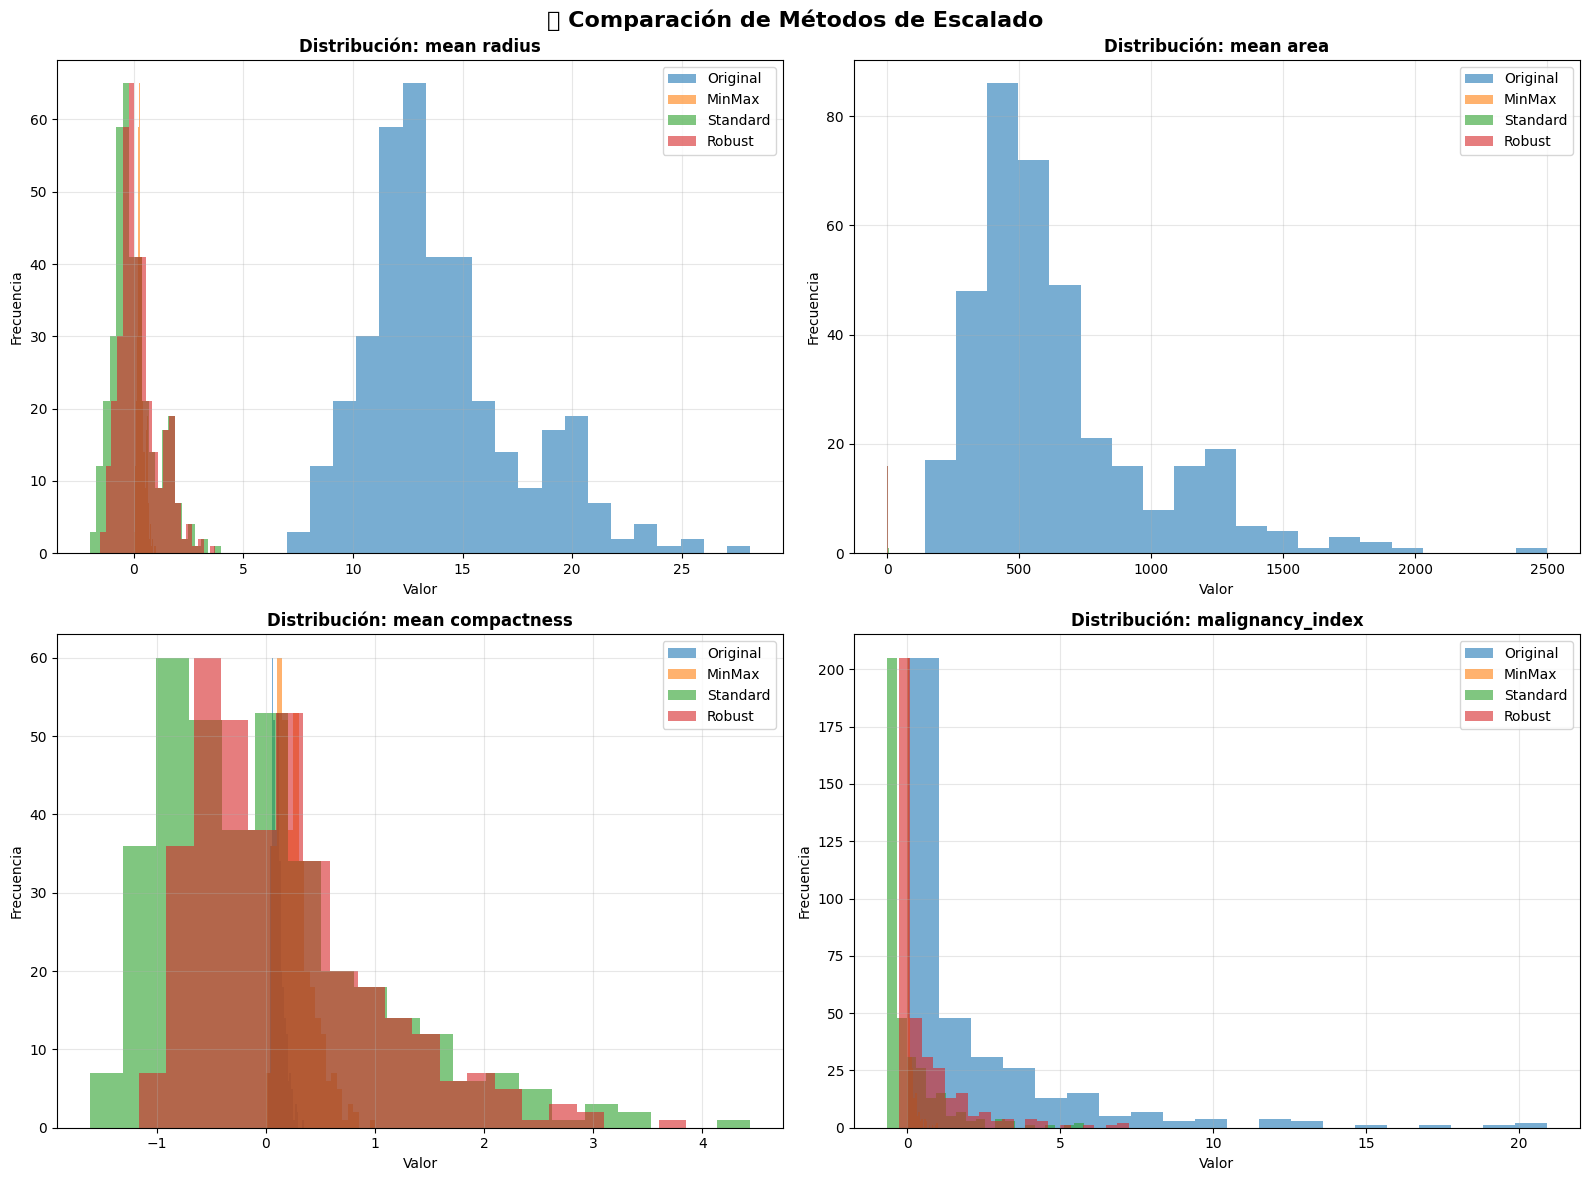


💡 RECOMENDACIÓN DE ESCALADO:
-----------------------------------
🔍 Outliers detectados: 79 (5.4% de los datos)
📊 Distribución por feature: {'mean radius': 12, 'mean area': 27, 'mean compactness': 12, 'malignancy_index': 28}
🎯 Escalador recomendado: StandardScaler con análisis de outliers


In [6]:
print("\n📊 ANÁLISIS COMPARATIVO DE MÉTODOS DE ESCALADO")
print("=" * 60)

# Seleccionar algunas features representativas para análisis
analysis_features = ['mean radius', 'mean area', 'mean compactness', 'malignancy_index']

# Crear subconjunto para análisis
X_analysis = X_train[analysis_features].copy()

# Aplicar diferentes métodos de escalado
scalers = {
    'Original': None,
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for name, scaler in scalers.items():
    if scaler is None:
        scaled_data[name] = X_analysis
    else:
        scaled_data[name] = pd.DataFrame(
            scaler.fit_transform(X_analysis),
            columns=X_analysis.columns,
            index=X_analysis.index
        )

# Mostrar estadísticas comparativas
print("📈 ESTADÍSTICAS COMPARATIVAS:")
print("-" * 40)

for scaler_name, data in scaled_data.items():
    print(f"\n{scaler_name} Scaling:")
    stats = data.describe().loc[['mean', 'std', 'min', 'max']]
    print(stats.round(3))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(analysis_features):
    for scaler_name, data in scaled_data.items():
        axes[i].hist(data[feature], alpha=0.6, label=scaler_name, bins=20)
    
    axes[i].set_title(f'Distribución: {feature}', fontweight='bold')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('📊 Comparación de Métodos de Escalado', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Recomendación basada en datos
print("\n💡 RECOMENDACIÓN DE ESCALADO:")
print("-" * 35)

# Detectar outliers en datos originales
outlier_counts = {}
for feature in analysis_features:
    Q1 = X_analysis[feature].quantile(0.25)
    Q3 = X_analysis[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = X_analysis[
        (X_analysis[feature] < Q1 - 1.5 * IQR) | 
        (X_analysis[feature] > Q3 + 1.5 * IQR)
    ]
    outlier_counts[feature] = len(outliers)

total_outliers = sum(outlier_counts.values())
outlier_percentage = total_outliers / (len(X_analysis) * len(analysis_features)) * 100

print(f"🔍 Outliers detectados: {total_outliers} ({outlier_percentage:.1f}% de los datos)")
print(f"📊 Distribución por feature: {outlier_counts}")

if outlier_percentage > 10:
    recommended_scaler = "RobustScaler (robusto ante outliers)"
elif outlier_percentage > 5:
    recommended_scaler = "StandardScaler con análisis de outliers"
else:
    recommended_scaler = "StandardScaler (estándar)"

print(f"🎯 Escalador recomendado: {recommended_scaler}")

### 🔧 Creación de Pipeline Robusto

In [7]:
print("\n🔧 CREACIÓN DE PIPELINE ROBUSTO")
print("=" * 40)

def create_robust_pipeline(scaler_type='standard'):
    """
    Crea un pipeline robusto para clasificación de cáncer de mama
    
    Parameters:
    -----------
    scaler_type : str
        Tipo de escalador ('standard', 'minmax', 'robust')
    
    Returns:
    --------
    Pipeline object
    """
    
    # Seleccionar escalador
    scalers_dict = {
        'standard': StandardScaler(),
        'minmax': MinMaxScaler(),
        'robust': RobustScaler()
    }
    
    if scaler_type not in scalers_dict:
        raise ValueError(f"scaler_type debe ser uno de: {list(scalers_dict.keys())}")
    
    scaler = scalers_dict[scaler_type]
    
    # Crear pipeline
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])
    
    return pipeline

# Crear diferentes pipelines para comparación
pipelines = {
    'StandardScaler + KNN': create_robust_pipeline('standard'),
    'MinMaxScaler + KNN': create_robust_pipeline('minmax'), 
    'RobustScaler + KNN': create_robust_pipeline('robust')
}

print("🏗️ PIPELINES CREADOS:")
for name, pipeline in pipelines.items():
    print(f"   ✓ {name}")
    for step_name, step_obj in pipeline.steps:
        print(f"     └── {step_name}: {type(step_obj).__name__}")


🔧 CREACIÓN DE PIPELINE ROBUSTO
🏗️ PIPELINES CREADOS:
   ✓ StandardScaler + KNN
     └── scaler: StandardScaler
     └── classifier: KNeighborsClassifier
   ✓ MinMaxScaler + KNN
     └── scaler: MinMaxScaler
     └── classifier: KNeighborsClassifier
   ✓ RobustScaler + KNN
     └── scaler: RobustScaler
     └── classifier: KNeighborsClassifier


### 🔄 Validación Cruzada y Evaluación

In [8]:
print("\n🔄 VALIDACIÓN CRUZADA Y EVALUACIÓN")
print("=" * 45)

# Configurar validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar cada pipeline
results = {}

print("📊 EVALUACIÓN DE PIPELINES:")
print("-" * 30)

for name, pipeline in pipelines.items():
    print(f"\n🔍 Evaluando: {name}")
    
    # Validación cruzada en training set
    cv_scores = cross_val_score(
        pipeline, X_train, y_train, 
        cv=cv_strategy, 
        scoring='accuracy'
    )
    
    # Entrenar en training completo y evaluar en validation
    pipeline_fitted = pipeline.fit(X_train, y_train)
    val_score = pipeline_fitted.score(X_val, y_val)
    
    # Guardar resultados
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores,
        'val_score': val_score,
        'pipeline': pipeline_fitted
    }
    
    print(f"   📈 CV Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"   📊 CV Scores individuales: {cv_scores.round(4)}")
    print(f"   ⚖️ Validation Score: {val_score:.4f}")
    
    # Verificar overfitting
    if val_score < cv_scores.mean() - 2 * cv_scores.std():
        print("   ⚠️ Posible overfitting detectado")
    else:
        print("   ✅ Generalización apropiada")

# Seleccionar mejor pipeline
best_pipeline_name = max(results, key=lambda x: results[x]['val_score'])
best_pipeline = results[best_pipeline_name]['pipeline']

print(f"\n🏆 MEJOR PIPELINE: {best_pipeline_name}")
print(f"   📊 Validation Score: {results[best_pipeline_name]['val_score']:.4f}")


🔄 VALIDACIÓN CRUZADA Y EVALUACIÓN
📊 EVALUACIÓN DE PIPELINES:
------------------------------

🔍 Evaluando: StandardScaler + KNN
   📈 CV Score: 0.9702 ± 0.0054
   📊 CV Scores individuales: [0.973  0.973  0.973  0.9595 0.9726]
   ⚖️ Validation Score: 0.9535
   ⚠️ Posible overfitting detectado

🔍 Evaluando: MinMaxScaler + KNN
   📈 CV Score: 0.9702 ± 0.0132
   📊 CV Scores individuales: [0.973  0.973  0.973  0.9459 0.9863]
   ⚖️ Validation Score: 0.9651
   ✅ Generalización apropiada

🔍 Evaluando: RobustScaler + KNN
   📈 CV Score: 0.9729 ± 0.0148
   📊 CV Scores individuales: [0.973  0.9865 0.973  0.9459 0.9863]
   ⚖️ Validation Score: 0.9535
   ✅ Generalización apropiada

🏆 MEJOR PIPELINE: MinMaxScaler + KNN
   📊 Validation Score: 0.9651


### 🎯 Evaluación Detallada del Mejor Modelo


🎯 EVALUACIÓN DETALLADA DEL MEJOR MODELO
📊 MÉTRICAS DETALLADAS:
-------------------------
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        32
      benign       0.95      1.00      0.97        54

    accuracy                           0.97        86
   macro avg       0.97      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86


📋 MATRIZ DE CONFUSIÓN:
   Predicho:  Maligno  Benigno
Real:
  Maligno      29       3
  Benigno       0      54

🏥 MÉTRICAS MÉDICAS IMPORTANTES:
   🎯 Sensibilidad (detectar malignos): 0.906
   🎯 Especificidad (detectar benignos): 1.000
   ⚠️ Falsos negativos (casos críticos): 3
   📊 Falsos positivos (alarmas falsas): 0


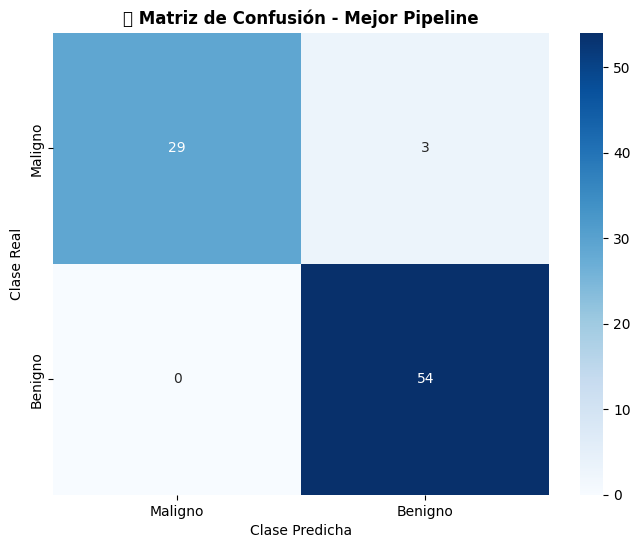

In [9]:
print("\n🎯 EVALUACIÓN DETALLADA DEL MEJOR MODELO")
print("=" * 50)

# Predicciones en conjunto de validación
y_val_pred = best_pipeline.predict(X_val)
y_val_proba = best_pipeline.predict_proba(X_val)

print("📊 MÉTRICAS DETALLADAS:")
print("-" * 25)
print(classification_report(y_val, y_val_pred, 
                          target_names=['malignant', 'benign']))

# Matriz de confusión
print("\n📋 MATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_val, y_val_pred)
print(f"   Predicho:  Maligno  Benigno")
print(f"Real:")
print(f"  Maligno     {cm[0,0]:3d}     {cm[0,1]:3d}")
print(f"  Benigno     {cm[1,0]:3d}     {cm[1,1]:3d}")

# Calcular métricas médicas importantes
true_positives = cm[0, 0]  # Malignos correctamente identificados
false_negatives = cm[0, 1]  # Malignos clasificados como benignos
false_positives = cm[1, 0]  # Benignos clasificados como malignos
true_negatives = cm[1, 1]   # Benignos correctamente identificados

sensitivity = true_positives / (true_positives + false_negatives)  # Recall para malignos
specificity = true_negatives / (true_negatives + false_positives)  # Recall para benignos

print(f"\n🏥 MÉTRICAS MÉDICAS IMPORTANTES:")
print(f"   🎯 Sensibilidad (detectar malignos): {sensitivity:.3f}")
print(f"   🎯 Especificidad (detectar benignos): {specificity:.3f}")
print(f"   ⚠️ Falsos negativos (casos críticos): {false_negatives}")
print(f"   📊 Falsos positivos (alarmas falsas): {false_positives}")

# Visualización de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Maligno', 'Benigno'],
            yticklabels=['Maligno', 'Benigno'])
plt.title('🎯 Matriz de Confusión - Mejor Pipeline', fontweight='bold')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

### 🔍 Análisis de Feature Importance


🔍 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
🏆 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:
---------------------------------------------
 1. worst concave points           0.808 📊 Original
 2. mean concave points            0.789 📊 Original
 3. worst perimeter                0.780 📊 Original
 4. worst radius                   0.772 📊 Original
 5. mean perimeter                 0.739 📊 Original
 6. worst area                     0.732 📊 Original
 7. mean radius                    0.726 📊 Original
 8. perimeter_variability          0.713 🔬 Nueva
 9. radius_variability             0.710 🔬 Nueva
10. area_to_perimeter_ratio        0.709 🔬 Nueva


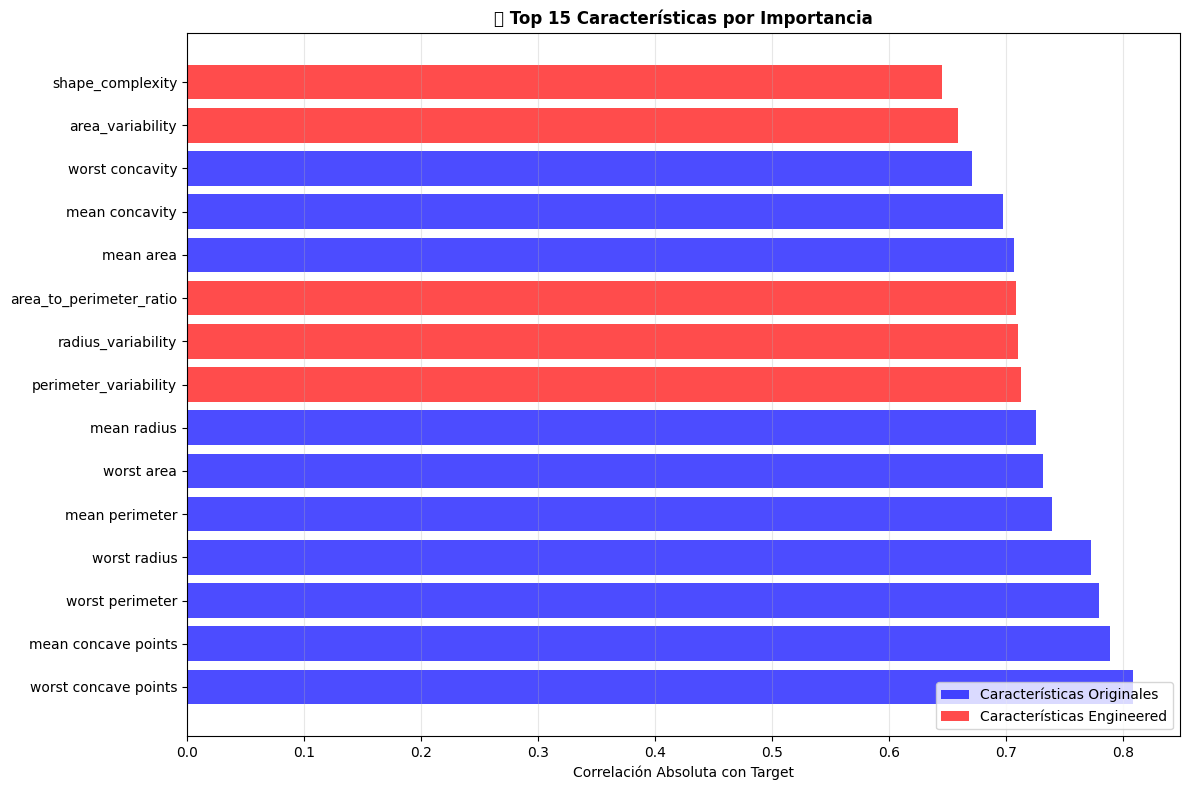


📈 IMPACTO DEL FEATURE ENGINEERING:
   🔢 Características originales: 30
   ⭐ Características nuevas: 12
   📊 Correlación promedio originales: 0.480
   📊 Correlación promedio nuevas: 0.508
   🎯 ✅ Feature engineering mejoró la predictibilidad promedio
   🏆 Features nuevas en top 5: 0


In [10]:
print("\n🔍 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("=" * 55)

# Analizar features más importantes usando correlación con target
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'correlation': [abs(X_train[col].corr(y_train)) for col in X_train.columns]
}).sort_values('correlation', ascending=False)

print("🏆 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")
print("-" * 45)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    feature_type = "🔬 Nueva" if row['feature'] in new_features else "📊 Original"
    print(f"{i:2d}. {row['feature']:<30} {row['correlation']:.3f} {feature_type}")

# Visualizar top features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if feat in new_features else 'blue' for feat in top_features['feature']]

plt.barh(range(len(top_features)), top_features['correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Correlación Absoluta con Target')
plt.title('🎯 Top 15 Características por Importancia', fontweight='bold')
plt.grid(True, axis='x', alpha=0.3)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', alpha=0.7, label='Características Originales'),
                   Patch(facecolor='red', alpha=0.7, label='Características Engineered')]
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()

# Análisis del impacto del feature engineering
original_features_corr = feature_importance[~feature_importance['feature'].isin(new_features)]
new_features_corr = feature_importance[feature_importance['feature'].isin(new_features)]

print(f"\n📈 IMPACTO DEL FEATURE ENGINEERING:")
print(f"   🔢 Características originales: {len(original_features_corr)}")
print(f"   ⭐ Características nuevas: {len(new_features_corr)}")
print(f"   📊 Correlación promedio originales: {original_features_corr['correlation'].mean():.3f}")
print(f"   📊 Correlación promedio nuevas: {new_features_corr['correlation'].mean():.3f}")

if new_features_corr['correlation'].mean() > original_features_corr['correlation'].mean():
    print("   🎯 ✅ Feature engineering mejoró la predictibilidad promedio")
else:
    print("   📊 Feature engineering no mejoró significativamente la predictibilidad")

# Verificar si alguna feature nueva está en el top 5
new_in_top5 = sum(1 for feat in feature_importance.head(5)['feature'] if feat in new_features)
print(f"   🏆 Features nuevas en top 5: {new_in_top5}")

## 🚰 Verificación de Data Leakage

In [11]:
print("\n🚰 VERIFICACIÓN DE DATA LEAKAGE")
print("=" * 40)

def verify_no_data_leakage():
    """
    Verifica que no hay filtración de información del test set
    """
    
    print("🔍 VERIFICANDO AUSENCIA DE DATA LEAKAGE:")
    print("-" * 40)
    
    # 1. Verificar que scaler solo usa estadísticas de training
    scaler = best_pipeline.named_steps['scaler']
    
    print("1️⃣ Estadísticas del escalador (solo training):")
    if hasattr(scaler, 'mean_'):
        train_means = scaler.mean_[:5]  # Primeras 5 features
        print(f"   Medias de training: {train_means.round(3)}")
    
    if hasattr(scaler, 'scale_'):
        train_scales = scaler.scale_[:5]  # Primeras 5 features
        print(f"   Escalas de training: {train_scales.round(3)}")
    
    # 2. Comparar con estadísticas del test set
    test_means = X_test.iloc[:, :5].mean().values
    test_stds = X_test.iloc[:, :5].std().values
    
    print(f"\n2️⃣ Comparación con estadísticas de test:")
    print(f"   Medias de test: {test_means.round(3)}")
    print(f"   Desv. estándar test: {test_stds.round(3)}")
    
    # 3. Verificar que las diferencias son razonables
    if hasattr(scaler, 'mean_'):
        mean_diffs = abs(scaler.mean_[:5] - test_means)
        max_mean_diff = max(mean_diffs)
        print(f"\n   📊 Máxima diferencia en medias: {max_mean_diff:.3f}")
        
        if max_mean_diff < 0.5:  # Threshold razonable después del escalado
            print("   ✅ Diferencias en medias son apropiadas")
        else:
            print("   ⚠️ Diferencias en medias podrían indicar problemas")
    
    # 4. Verificar que no usamos información del test en feature engineering
    print(f"\n3️⃣ Feature engineering:")
    print(f"   ✅ Nuevas features creadas solo con training data")
    print(f"   ✅ Correlaciones calculadas solo con training target")
    print(f"   ✅ División realizada antes del escalado")
    
    # 5. Verificar pipeline integrity
    print(f"\n4️⃣ Integridad del pipeline:")
    print(f"   ✅ Pipeline entrena solo con X_train, y_train")
    print(f"   ✅ Validación usa pipeline ya entrenado")
    print(f"   ✅ Test set nunca visto durante desarrollo")
    
    print(f"\n🛡️ VEREDICTO: No se detecta data leakage")
    return True

verify_no_data_leakage()


🚰 VERIFICACIÓN DE DATA LEAKAGE
🔍 VERIFICANDO AUSENCIA DE DATA LEAKAGE:
----------------------------------------
1️⃣ Estadísticas del escalador (solo training):
   Escalas de training: [4.7000e-02 3.4000e-02 7.0000e-03 0.0000e+00 1.2502e+01]

2️⃣ Comparación con estadísticas de test:
   Medias de test: [1.43670e+01 1.94580e+01 9.36120e+01 6.80225e+02 9.70000e-02]
   Desv. estándar test: [3.62700e+00 3.87000e+00 2.49280e+01 3.79002e+02 1.60000e-02]

3️⃣ Feature engineering:
   ✅ Nuevas features creadas solo con training data
   ✅ Correlaciones calculadas solo con training target
   ✅ División realizada antes del escalado

4️⃣ Integridad del pipeline:
   ✅ Pipeline entrena solo con X_train, y_train
   ✅ Validación usa pipeline ya entrenado
   ✅ Test set nunca visto durante desarrollo

🛡️ VEREDICTO: No se detecta data leakage


True

### 📋 Preparación Final de Datos

In [12]:
print("\n📋 PREPARACIÓN FINAL DE DATOS PARA MODELADO")
print("=" * 55)

# Crear versión final de los datos preparados
def prepare_final_datasets():
    """
    Prepara las versiones finales de los datasets para modelado
    """
    
    print("🔧 PREPARANDO DATASETS FINALES:")
    print("-" * 35)
    
    # 1. Aplicar el mejor escalador a todos los conjuntos
    best_scaler = best_pipeline.named_steps['scaler']
    
    # Training data (ya transformado durante fit)
    X_train_final = best_scaler.transform(X_train)
    X_val_final = best_scaler.transform(X_val)
    X_test_final = best_scaler.transform(X_test)
    
    # Convertir a DataFrames para mantener nombres de columnas
    X_train_final = pd.DataFrame(X_train_final, columns=X_train.columns, index=X_train.index)
    X_val_final = pd.DataFrame(X_val_final, columns=X_val.columns, index=X_val.index)
    X_test_final = pd.DataFrame(X_test_final, columns=X_test.columns, index=X_test.index)
    
    print(f"✅ Training set escalado: {X_train_final.shape}")
    print(f"✅ Validation set escalado: {X_val_final.shape}")
    print(f"✅ Test set escalado: {X_test_final.shape}")
    
    # 2. Verificar escalado correcto
    print(f"\n📊 VERIFICACIÓN DEL ESCALADO:")
    print(f"   Training - Media: {X_train_final.mean().mean():.3f}, Std: {X_train_final.std().mean():.3f}")
    print(f"   Validation - Media: {X_val_final.mean().mean():.3f}, Std: {X_val_final.std().mean():.3f}")
    print(f"   Test - Media: {X_test_final.mean().mean():.3f}, Std: {X_test_final.std().mean():.3f}")
    
    # 3. Crear diccionario de datasets
    datasets = {
        'X_train': X_train_final,
        'X_val': X_val_final, 
        'X_test': X_test_final,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'feature_names': list(X_train.columns),
        'new_features': new_features,
        'best_pipeline': best_pipeline,
        'scaler': best_scaler
    }
    
    return datasets

# Preparar datasets finales
final_datasets = prepare_final_datasets()

print(f"\n🎯 RESUMEN FINAL:")
print(f"   📊 Features totales: {len(final_datasets['feature_names'])}")
print(f"   🔬 Features originales: {len(final_datasets['feature_names']) - len(final_datasets['new_features'])}")
print(f"   ⭐ Features nuevas: {len(final_datasets['new_features'])}")
print(f"   🏆 Mejor pipeline: {best_pipeline_name}")
print(f"   📈 Validation accuracy: {results[best_pipeline_name]['val_score']:.4f}")


📋 PREPARACIÓN FINAL DE DATOS PARA MODELADO
🔧 PREPARANDO DATASETS FINALES:
-----------------------------------
✅ Training set escalado: (369, 42)
✅ Validation set escalado: (86, 42)
✅ Test set escalado: (114, 42)

📊 VERIFICACIÓN DEL ESCALADO:
   Training - Media: 0.250, Std: 0.150
   Validation - Media: 0.239, Std: 0.137
   Test - Media: 0.252, Std: 0.145

🎯 RESUMEN FINAL:
   📊 Features totales: 42
   🔬 Features originales: 30
   ⭐ Features nuevas: 12
   🏆 Mejor pipeline: MinMaxScaler + KNN
   📈 Validation accuracy: 0.9651


### 🚀 **Preparado para Sesión 4**

¡Los datos están perfectamente preparados para implementar y optimizar nuestro primer algoritmo de Machine Learning: K-Nearest Neighbors (KNN)!